In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

import sys
print (sys.version)

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [3]:
# main simulator function

def simulator(isBar, plotTogether, m_gw, k_arr, colors, a_f, e_p, era_func, xl, yl, tl):
    #plotting details
    
    if not plotTogether:
        sc = 8
        plt.figure(figsize=(sc * 2, sc * 1))
        plt.xscale('log', base = 10)
        plt.xlabel(xl, fontsize = 15)
        plt.ylabel(yl, fontsize = 15)
        plt.title(tl, fontsize = 15)
    
    #range of eta values
    eta_range = np.logspace(e_p[0], e_p[1], e_p[2])
    
    #plotting the passed in k values
    for i in range(len(k_arr)):
        sol = solve_ivp(era_func(m_gw, k_arr[i], a_f), t_span = [eta_range[0], eta_range[-1]], y0 = [1, 0], t_eval = eta_range)
        
        if isBar:         
            lab = "" if plotTogether else "k = " + str(k_arr[i])
            plt.plot(sol.t, sol.y[0], colors[i], label = lab)
        else:
            plt.plot(sol.t, sol.y[0] / (a_f(sol.t)), colors[i], label = "k = " + str(k_arr[i]) + " ")
        
    #plot legend
    plt.legend()
    

In [ ]:
# # RD in GR case (direct)

# def rd_eq(m_gw, k, a_func):
#     def diff_eq(eta, y):
#         g = y[0]
#         v = y[1]
#         return [v, -(k**2 + (a_func(eta) * m_gw)**2) * g]
#     return diff_eq

# #first boolean: true for gamma bar, false for gamma (just divides by a)

# #gamma bar
# #simulator(True, False, 0, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: eta, (-5, -1, 5000), rd_eq, r"$\eta$", r"$\overline{\gamma}_{k}$", "GR in RD")

# #gamma
# simulator(False, False, 0, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: eta, (-3, -1, 5000), rd_eq, r"$\eta$", r"$\gamma_{k}$", "GR in RD")

In [ ]:
# #RD in MG Case (direct)

# #gamma bar
# # simulator(True, False, 1e6, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: eta, (-5, -1, 5000), rd_eq, r"$\eta$", r"$\overline{\gamma}_{k}$", "MG in RD")

# #gamma
# simulator(False, False, 1e6, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: eta, (-3, -1, 5000), rd_eq, r"$\eta$", r"$\gamma_{k}$", "MG in RD")

In [ ]:
# # MD in GR case (direct)

# def md_eq(m_gw, k, a_func):
#     def diff_eq(eta, y):
#         g = y[0]
#         v = y[1]
#         return [v, -(k**2 + (a_func(eta) * m_gw)**2 - (2 / eta**2)) * g]
#     return diff_eq

# # simulator(True, 0, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: (eta ** 2), (-5, -1, 5000), md_eq, r"$\eta$", r"$\overline{\gamma}_{k}$", "GR in MD")

# simulator(False, 0, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: (eta ** 2), (-3, -1, 5000), md_eq, r"$\eta$", r"$\gamma_{k}$", "GR in MD")

In [ ]:
# # MD in MG case (direct)

# # simulator(True, 1e6, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: (eta ** 2), (-5, -1, 5000), md_eq, r"$\eta$", r"$\overline{\gamma}_{k}$", "MG in MD")
# simulator(False, 1e6, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: (eta ** 2), (-3, -1, 5000), md_eq, r"$\eta$", r"$\gamma_{k}$", "MG in MD")

In [4]:
#Indirect Solution

def rd_eq_new(m_gw, k, a_func):
    def diff_eq(eta, y):
        g = y[0]
        v = y[1]
        return [v, -(2 * v / eta) - g*(k**2 + (a_func(eta) * m_gw)**2)]
    return diff_eq


def md_eq_new(m_gw, k, a_func):
    def diff_eq(eta, y):
        g = y[0]
        v = y[1]
        #the 4 below is different than 2 above
        return [v, -(4 * v / eta) - g*(k**2 + (a_func(eta) * m_gw)**2)]
    return diff_eq

#leaving True for gamma bar, even though this is gamma -> since era_func is specified above

# simulator(True, False, 0, [1000, 2000, 3000], ["b-", "r-", "g-"], lambda eta: eta, (-5, 0, 5000), rd_eq_new, r"$\eta$", r"Test: $\gamma_{k}$", "GR in RD (Indirect Solution)")


8.232493552866496e-05


KeyboardInterrupt: 

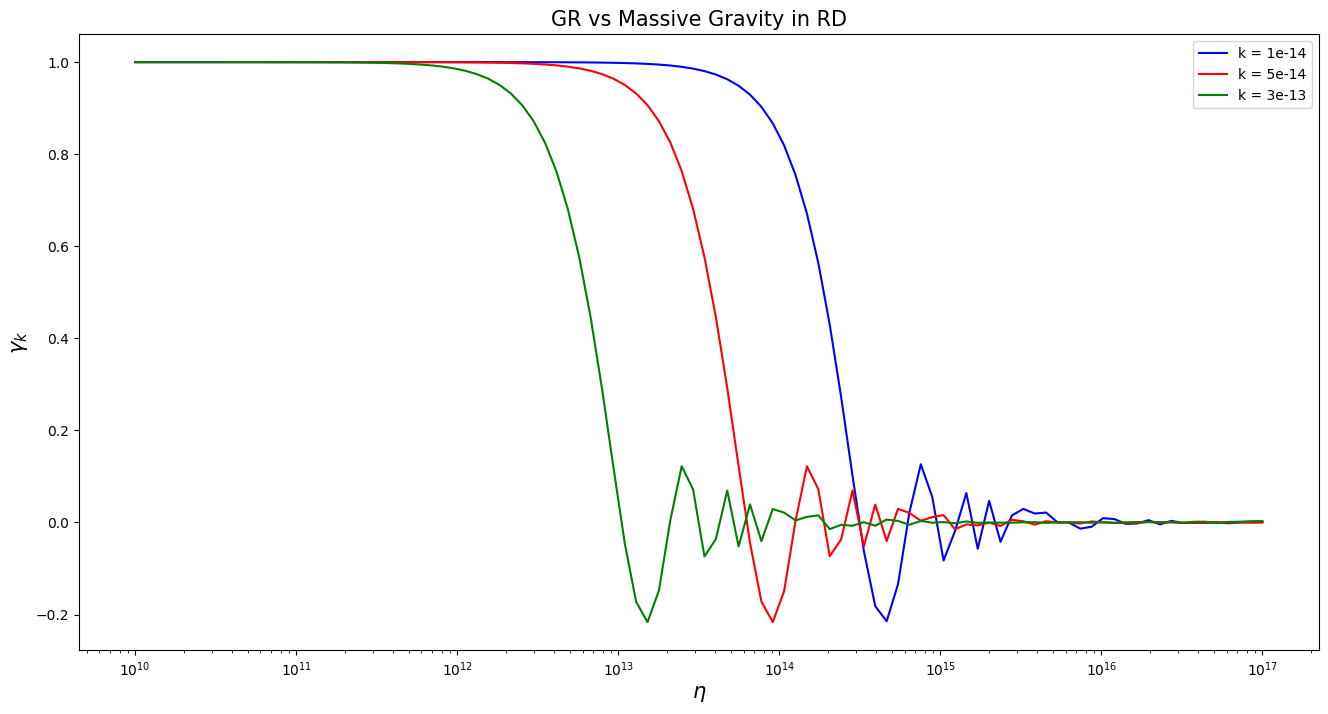

In [18]:
#GR and MG entering in RD, indirect, both plotted

M_GW = 2 * 1e-7 #see emir, numerical section
H_0 = M_GW / 1e10
h = 0.71
omega_R = (4.15 * 1e-5) / (h**2) #see emir
k_c = H_0 * 1e4

def RD_a_func(eta):
    return H_0 * np.sqrt(omega_R) * eta


arr = [1e-14, 5e-14, 3e-13]
#GR
simulator(True, False, 0 * M_GW, arr, ["b-", "r-", "g-"], RD_a_func, (10, 17, 100), rd_eq_new, r"$\eta$", r"$\gamma_{k}$", "GR vs Massive Gravity in RD")
# simulator(True, False, 0, [1, 2, 3], ["b-", "r-", "g-"], lambda eta: eta, (-1, 2, 5000), rd_eq_new, r"$\eta$", r"$\gamma_{k}$", "GR vs massive gravity (dotted) in RD")

#MG
simulator(True, True, 1 * M_GW, arr, ["b--", "r--", "g--"], RD_a_func, (10, 17, 100), rd_eq_new, "","", "")
# simulator(True, True, 1, [1, 2, 3], ["b--", "r--", "g--"], lambda eta: eta, (-1, 2, 5000), rd_eq_new, "", "", "")


In [ ]:
# #GR and MG entering in MD, indirect, both plotted

# #using smaller k-values since these modes are entering later, in MD (?)

# #GR
# simulator(True, False, 0, [1, 2, 3], ["b-", "r-", "g-"], lambda eta: eta**2, (-1, 2, 5000), md_eq_new, r"$\eta$", r"Test: $\gamma_{k}$", "[IS] GR vs MG (dotted) in MD")

# #MG
# simulator(True, True, 1, [1, 2, 3], ["b--", "r--", "g--"], lambda eta: eta**2, (-1, 2, 5000), md_eq_new, r"$\eta$", r"Test: $\gamma_{k}$", "")

In [ ]:
# simulator(True, True, 1, [1, 2, 3], ["b--", "r--", "g--"], lambda eta: eta**2, (-1, 2, 5000), md_eq_new, r"$\eta$", r"Test: $\gamma_{k}$", "")